In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
def outlier_thresholds(df, col_name, q1=0.5, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    up = quartile3 + 1.5 * iqr
    low = quartile1 - 1.5 * iqr
    return low, up

In [4]:
def check_outlier(df, col_name):
    low, up = outlier_thresholds(df, col_name)
    return True if df[(df[col_name] > up) | (df[col_name] < low)].any(axis = None) else False

In [5]:
def replace_with_thresholds(df, veriable):
    low, up = outlier_thresholds(df, veriable)
    df.loc[(df[veriable] < low), veriable] = low
    df.loc[(df[veriable] > up), veriable] = up

In [6]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print(25 * "#")
    if plot:
        sns.countplot(x=df[col_name], data = df)
        plt.show()

In [7]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=30)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [8]:
def target_summary_with_cat(df, target, cat_cols):
    for col in cat_cols:
        print(col, ":", "TARGET")
        print(pd.DataFrame({col: df[col].value_counts(),
                            "Ratio": 100 * df[col].value_counts() / len(df),
                            "TARGET_MEAN": df.groupby(col)[target].mean()}), end="\n\n\n")

In [9]:
df = pd.read_csv("/kaggle/input/developer-salary/salary.csv")

In [10]:
df.head()

,Time,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary
0,2023-01-22 18:49:36.202,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL
1,2023-01-22 18:49:38.280,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL
2,2023-01-22 18:49:41.383,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL
3,2023-01-22 18:50:19.296,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL
4,2023-01-22 18:51:13.644,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL


## Verileri Düzenleyelim

In [11]:
df.drop("Time", axis=1, inplace=True)

In [12]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL


### Salary değişkeni üzerinde sayısal işlem yapabilmek için min-max olarak verileri bölüyoruz.

In [13]:
df["salary_min"] = df["Salary"].apply(lambda x: x.split("-")[0][:-1])
df["salary_max"] = df["Salary"].apply(lambda x: x.split("-")[1][1:7] if len(x.split("-")) > 1  else np.nan)

In [14]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,salary_min,salary_max
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51.000,55.000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16.000,20.000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41.000,45.000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11.000,15.000


In [15]:
df["salary_min"] = df["salary_min"].apply(lambda x: x.replace(".", ""))
df["salary_max"] = df["salary_max"].apply(lambda x: x.replace(".", "") if x is not np.nan else x)

In [16]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,salary_min,salary_max
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000


### Verileri sayısal değişkene dönüştürmeden önce bazı işlemleri gerçekleştirmek gerekiyor. Tüm verilerin sayısal formata uyması lazım.

In [17]:
df["salary_min"].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000+ T'],
      dtype=object)

In [18]:
df["salary_min"] = df["salary_min"].apply(lambda x: "200000"if x == "200000+ T" else x)

In [19]:
df["salary_min"].unique()

array(['41000', '51000', '16000', '11000', '21000', '5000', '31000',
       '56000', '91000', '26000', '101000', '36000', '151000', '81000',
       '71000', '66000', '46000', '121000', '61000', '200000'],
      dtype=object)

In [20]:
df["salary_max"].unique()

array(['45000', '55000', '20000', '15000', '25000', '10000', '35000',
       '60000', '30000', '12000', '40000', '90000', '80000', '70000',
       '50000', '65000', nan], dtype=object)

### **salary_max** değişkeni null olan satırlar belirli bir aralık girilmeyen satırlardır. Örneğin 5000-7000 gibi bir aralık yazılması gerekirken 6000 gibi net maaş bilgisi girilmiş olabilir. Bu durumda null değerleri **salary_min** değişkeni ile dolduruyoruz.

In [21]:
null_value_index = df[df["salary_max"].isnull()]["salary_max"].index

In [22]:
for i in null_value_index:
    df["salary_max"][i] = df["salary_min"][i]

In [23]:
df["salary_min"] = df["salary_min"].astype("int")
df["salary_max"] = df["salary_max"].astype("int")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position          1164 non-null   object
 1   Level             1164 non-null   object
 2   Experience        1164 non-null   object
 3   Technology        1164 non-null   object
 4   Location          1164 non-null   object
 5   Way_of_working    1164 non-null   object
 6   Employees_number  1164 non-null   object
 7   Salary_type       1164 non-null   object
 8   Salary            1164 non-null   object
 9   salary_min        1164 non-null   int64 
 10  salary_max        1164 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 100.2+ KB


In [25]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,salary_min,salary_max
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000


### Ortalama maaş bilgisine ulaşmak için **salary_max** değişkeni ile **salary_min** değişkenlerinin ortalamasını alıyoruz. 

In [26]:
df["salary"] = (df["salary_min"] + df["salary_max"]) / 2

In [27]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,salary_min,salary_max,salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Yerinde / Ofiste,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000.00
1,Architect / Mimar,Tanımsız,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000,53000.00
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000,18000.00
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000.00
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Yerinde / Ofiste,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000,13000.00


### Kategorik Değişkenleri İnceleyelim.

In [28]:
df["Level"].unique()

array(['Mid', 'Tanımsız', 'Junior', 'Senior'], dtype=object)

### **Level** değişkeninde Tanımsız değerler var. Bu değerleri kendi yorumuma göre **fill_undefined_level** fonksiyonu ile değiştiriyorum.

In [29]:
def fill_undefined_level(x):
    if x["Level"] == "Tanımsız":
        if x["Experience"] == "0-1 Yıl" or x["Experience"] == "1-3 Yıl":
            return "Junior"
        elif x["Experience"] == "4-6 Yıl":
            return "Mid"
        elif x["Experience"] == "10+ Yıl" or x["Experience"] == "7-9 Yıl":
            return "Senior"
    else:
        return x["Level"]

In [30]:
df["Level"] = df.apply(fill_undefined_level, axis=1)

In [31]:
df["Level"].unique()

array(['Mid', 'Junior', 'Senior'], dtype=object)

In [32]:
df["Way_of_working"].unique()

array(['Yerinde / Ofiste', 'Remote', 'Hybrid'], dtype=object)

In [33]:
df["Way_of_working"] = df["Way_of_working"].apply(lambda x: "Ofis" if x == "Yerinde / Ofiste" else x)

In [34]:
df["Experience"].unique()

array(['1-3 Yıl', '4-6 Yıl', '0-1 Yıl', '10+ Yıl', '7-9 Yıl'],
      dtype=object)

In [35]:
df["Location"].unique()

array(['Türkiye', 'Yurtdışı'], dtype=object)

In [36]:
df["Salary_type"].unique()

array(['Türk Lirası', 'Dolar', 'Sterlin', 'Çek Kronu', 'Euro',
       'Maaş TL Primler Dolar', '25000', 'Canadian Dolar', '11500',
       '1250', 'Zloty', '250 Dolar 4700tl ortalama', 'Aud', 'USDT',
       'İsviçre Frangi', '1500', 'Dolar bazlı TL', '3000', 'Leva', 'CAD',
       'Dolar endeksli Türk lirası(2 ayda bir dolara göre zam)', 'Dirhem'],
      dtype=object)

### **Salary_type** değişkeninde aynı anlama gelen farklı ifadeler var. Bu ifadeleri **change_salary_type** fonksiyonu ile değiştiriyorum.

In [37]:
def change_salary_type(x):
    if x == "Maaş TL Primler Dolar" or x == 25000 or x == 11500 or x == "Dolar bazlı TL" or x == "Dolar endeksli Türk lirası(2 ayda bir dolara göre zam)":
        return "Türk Lirası"
    elif x == 1250 or x == "250 Dolar 4700tl ortalama" or x == "USDT" or x == 1500 or x == 3000:
        return "Dolar"
    elif x == "CAD":
        return "Canadian Dolar"
    else:
        return x

In [38]:
df["Salary_type"] = df["Salary_type"].apply(change_salary_type)

In [39]:
df["Salary_type"].unique()

array(['Türk Lirası', 'Dolar', 'Sterlin', 'Çek Kronu', 'Euro', '25000',
       'Canadian Dolar', '11500', '1250', 'Zloty', 'Aud',
       'İsviçre Frangi', '1500', '3000', 'Leva', 'Dirhem'], dtype=object)

In [40]:
df.head()

,Position,Level,Experience,Technology,Location,Way_of_working,Employees_number,Salary_type,Salary,salary_min,salary_max,salary
0,Backend Developer,Mid,1-3 Yıl,Java / Spring,Türkiye,Ofis,100-300,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000.00
1,Architect / Mimar,Mid,4-6 Yıl,"React / NextJS, NodeJS, Javascript, React Native",Türkiye,Remote,2000+,Türk Lirası,51.000 - 55.000 TL,51000,55000,53000.00
2,Frontend Developer,Junior,1-3 Yıl,"React / NextJS, Javascript",Türkiye,Remote,100-300,Türk Lirası,16.000 - 20.000 TL,16000,20000,18000.00
3,Backend Developer,Mid,4-6 Yıl,Java / Spring,Türkiye,Hybrid,300-1000,Türk Lirası,41.000 - 45.000 TL,41000,45000,43000.00
4,Fullstack Developer,Junior,0-1 Yıl,"React / NextJS, NodeJS, Javascript",Türkiye,Ofis,50-100,Türk Lirası,11.000 - 15.000 TL,11000,15000,13000.00


In [41]:
df["Employees_number"].value_counts()

10-30        217
0-10         187
2000+        184
100-300      145
300-1000     133
50-100       116
30-50        102
1000-2000     80
Name: Employees_number, dtype: int64

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_min,1164.00,27390.89,24645.71,5000.00,11000.00,21000.00,31000.00,200000.00
salary_max,1164.00,28362.54,18974.50,10000.00,15000.00,25000.00,35000.00,200000.00
salary,1164.00,27876.72,19966.97,7500.00,13000.00,23000.00,33000.00,200000.00


In [43]:
df.shape

(1164, 12)

### Aykırı Değerleri IQR Yöntemi ile Baskılayalım. Maaş hassas bir değişken olduğu için çok keskin bir baskılama işlemi yapmak istemiyorum. Bu işlemi **%10** ve **%90** dilimlik değerlere göre yapıyorum.

In [44]:
replace_with_thresholds(df, "salary")

Verileri Analiz Edelim.

In [45]:
df.groupby("Level").agg({"salary": ["count","mean","std", "median", "min", "max"]})

salary                                             
        count     mean      std   median     min       max
Level                                                     
Junior    469 17007.46 10318.10 13000.00 7500.00  75500.00
Mid       384 27505.21 13382.55 23000.00 7500.00  85500.00
Senior    311 43736.33 20418.95 43000.00 7500.00 123000.00

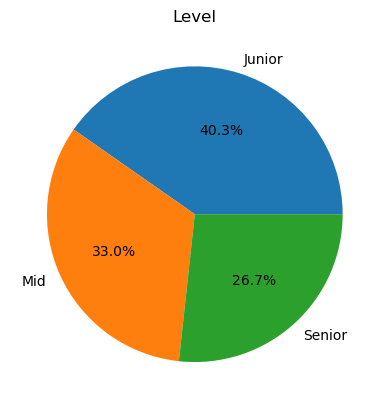

In [46]:
plt.pie(df["Level"].value_counts(), labels=df["Level"].value_counts().index, autopct='%1.1f%%')
plt.title("Level")
plt.show()

### Verilerin Dağılımı Yukarıdaki Grafikte Gösterilmiştir. 469 tane Junior seviye maaş bilgisi, 384 tane Mid seviye maaş bilgisi ve 311 tane Senior seviye maaş bilgisi bulunmaktadır.

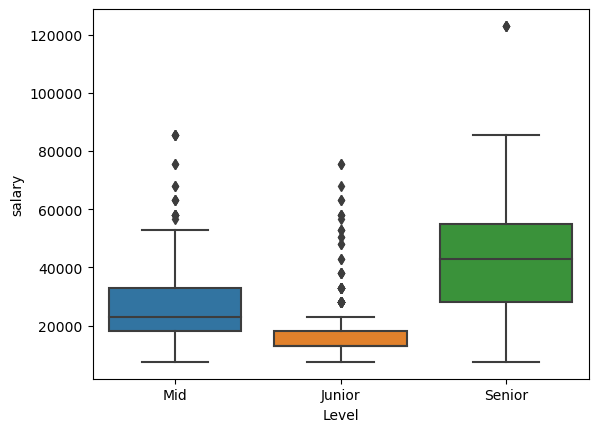

In [47]:
sns.boxplot(x="Level", y="salary", data=df)
plt.show()

### Maaşların seviyelere göre kutu grafiği yukarıda gösterilmiştir. **Junior** seviye maaşları verilere göre ortalama **17000 TL**, **Mid** seviye maaşları verilere göre ortalama **27500 TL** ve **Senior** seviye maaşları ise ortalama **43700 TL**. Maaşların dağılımı yurtdışı ve yurtiçi karışık olarak verilmiş. Bu yüzden yurtiçi ve yurtdışı maaşlarını ayrı ayrı incelemek daha doğru olacaktır.

### Junior Değerleri İçerisinde Bulunan Aykırı Değerleri Daha Önce İncelemiştim. Bu Aykırı Değerleri IQR Yöntemi İle Baskıladığım Zaman Ortalamayı Çok Fazla Etkilemediği İçin İşlem Yapmak istemiyorum. Söz Konusu Maaş Değişkeni Olduğu İçin Bu Değerleri Kaybetmek İstemiyorum. Senior Değerleri İçerisinde Bulunan Aykırı Değerleri Zaten Yukarıda Baskılamıştık.

In [48]:
def create_count_mean_table(df:pd.DataFrame, col:str, target:str):
    """This function creates a table that shows the count and mean of the target variable for each category of the given column.

    Args:
        df (pd.DataFrame): Your dataframe.
        col (str): The column you want to group by.
        target (str): The target variable.

    Returns:
        pd.DataFrame: The table that shows the count and mean of the target variable for each category of the given column.
    """
    temp_df = df.groupby(col).agg({target: ["count", "mean"]}).reset_index()
    temp_df.columns = [col, "Count", "Mean"]
    return temp_df

In [49]:
df_temp_level = create_count_mean_table(df, "Level", "salary")
df_temp_level

,Level,Count,Mean
0,Junior,469,17007.46
1,Mid,384,27505.21
2,Senior,311,43736.33


In [50]:
df_temp_location = create_count_mean_table(df, "Location", "salary")
df_temp_location

,Location,Count,Mean
0,Türkiye,1033,24654.89
1,Yurtdışı,131,50931.30


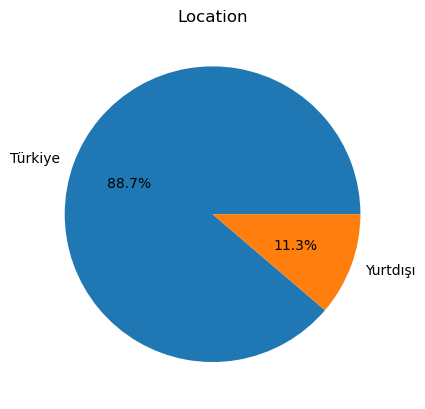

In [51]:
plt.pie(df["Location"].value_counts(), labels=df["Location"].value_counts().index, autopct='%1.1f%%')
plt.title("Location")
plt.show()

In [52]:
df_temp_employee = create_count_mean_table(df, "Employees_number", "salary")
df_temp_employee

,Employees_number,Count,Mean
0,0-10,187,20585.56
1,10-30,217,24320.28
2,100-300,145,30213.79
3,1000-2000,80,31900.00
4,2000+,184,32092.39
5,30-50,102,27411.76
6,300-1000,133,29142.86
7,50-100,116,30202.59


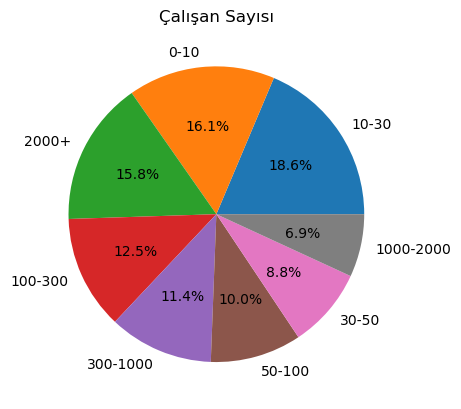

In [53]:
plt.pie(df["Employees_number"].value_counts(), labels=df["Employees_number"].value_counts().index, autopct='%1.1f%%')
plt.title("Çalışan Sayısı")
plt.show()

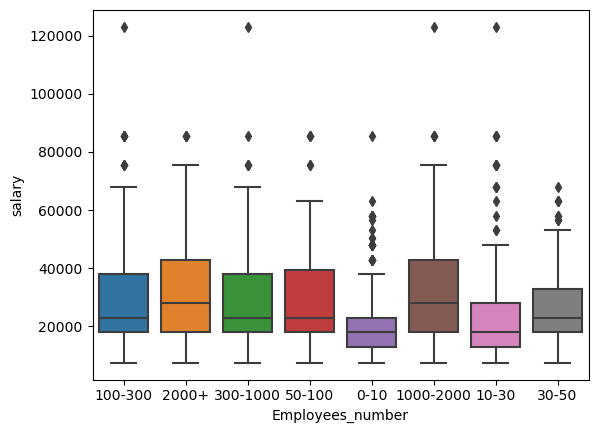

In [54]:
sns.boxplot(x="Employees_number", y="salary", data=df)
plt.show()

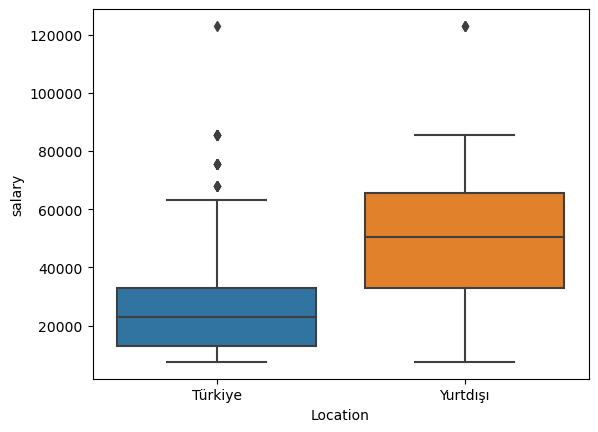

In [55]:
sns.boxplot(x="Location", y="salary", data=df)
plt.show()

### Verilerin Türkiye ve Yurtdışı Olarak Dağılımı Kutu Grafiği İle Gösterilmiştir. **Türkiye** ortalaması **24650 TL** ve **Yurtdışı** ortalaması **50900 TL**. Yurtdışı maaşlarının TL olarak daha yüksek olduğu görülmektedir.

In [56]:
df_temp_experience = create_count_mean_table(df, "Experience", "salary")
df_temp_experience

,Experience,Count,Mean
0,0-1 Yıl,268,14710.82
1,1-3 Yıl,438,23108.45
2,10+ Yıl,134,48376.87
3,4-6 Yıl,224,33430.80
4,7-9 Yıl,100,41055.00


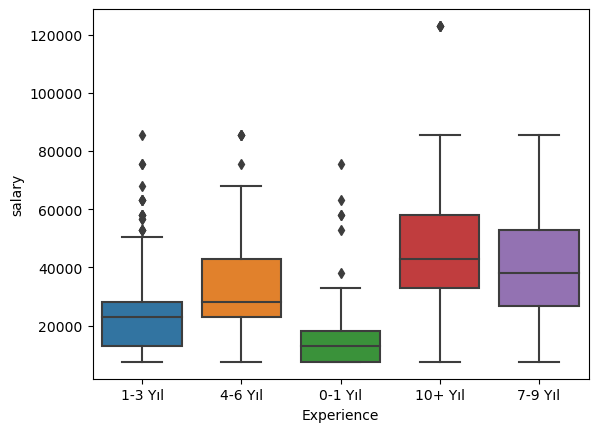

In [57]:
sns.boxplot(x="Experience", y="salary", data=df)
plt.show()

### Yukarıda Deneyime Göre Maaşların Ortalamasını Gösteren Kutu Grafiği Gösterilmiştir. **0-1 Yıl** deneyimli kişilerin maaşı **14700 TL**, **1-3 Yıl** deneyimli kişilerin maaşı **23100 TL**, **4-6 Yıl** deneyimli kişilerin maaşı **33400 TL**, **7-9 Yıl** deneyimli kişilerin maaşı **41000 TL** ve **10+** yıl deneyimli kişilerin maaşı **48300 TL** dir.

In [58]:
df_temp_way_of_working = create_count_mean_table(df, "Way_of_working", "salary")
df_temp_way_of_working

,Way_of_working,Count,Mean
0,Hybrid,341,27021.99
1,Ofis,223,21461.88
2,Remote,600,30233.33


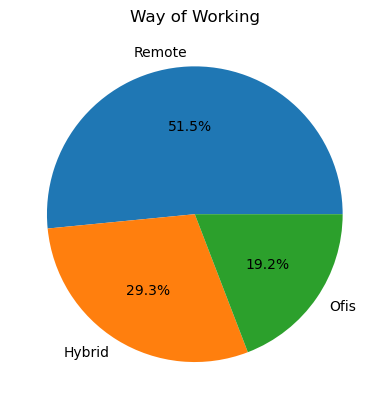

In [59]:
plt.pie(df["Way_of_working"].value_counts(), labels=df["Way_of_working"].value_counts().index, autopct='%1.1f%%')
plt.title("Way of Working")
plt.show()

### Çalışma şekillerinin dağılımı yukarıda gösterilmiştir. **Remote** çalışma şekli 600 gözlem, **Hybrid** çalışma şekli 341 gözlem ve **Ofis** çalışma şekli 223 gözlem içeriyor.

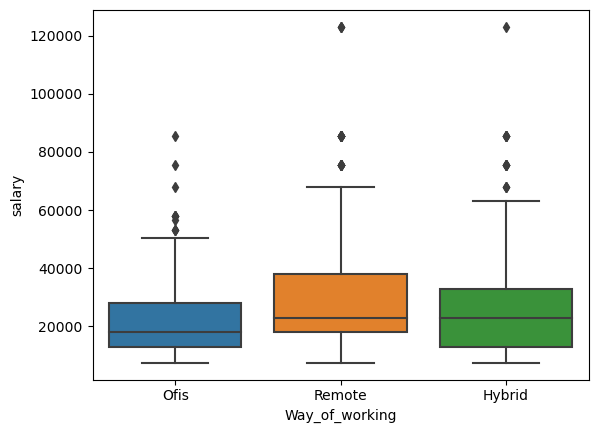

In [60]:
sns.boxplot(x="Way_of_working", y="salary", data=df)
plt.show()

### Çalışma şekillerinin dağılımı kutu grafiği ile gösterilmiştir. **Remote** çalışma şekli ortalama **30200 TL**, **Hybrid** çalışma şekli ortalama **27000 TL** ve **Ofis** çalışma şekli ortalama **21400 TL** dir.

## Seviye Bazlı Ortalama Maaşlar

In [61]:
def create_location_salary_table(df, veriable):
    return df[df["Level"] == veriable].groupby("Location").agg({"salary": ["count","mean","std", "median", "min", "max"]})

In [62]:
def create_location_way_of_working_table(df, veriable):
    return df[df["Level"] == veriable].pivot_table(index="Location", columns="Way_of_working", values="salary", aggfunc=["count","mean"])

In [63]:
def plot_location_pie(data):
    plt.pie(data["salary"]["count"], labels=data.index, autopct='%1.1f%%')
    plt.title("Location")
    plt.show()

In [64]:
def plot_location_box(df,veriable):
    sns.boxplot(x="Location", y="salary", data=df[df["Level"] == veriable])
    plt.show()

In [65]:
def plot_location_bar(data, label = False):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    data["count"].plot.bar(ax=axes[0], title="Count")
    data["mean"].plot.bar(ax=axes[1], title="Mean")
    for cont in axes[0].containers:
        axes[0].bar_label(cont, fmt='%d', padding=1)
    if label:
        for ax in axes[1:]:
            for cont in ax.containers:
                ax.bar_label(cont, fmt='%d', padding=1)
    plt.show()

## Junior

In [66]:
junior_table = create_location_salary_table(df, "Junior")

In [67]:
junior_table

salary                                            
          count     mean      std   median     min      max
Location                                                   
Türkiye     431 15435.03  7270.47 13000.00 7500.00 75500.00
Yurtdışı     38 34842.11 19412.00 30500.00 7500.00 75500.00

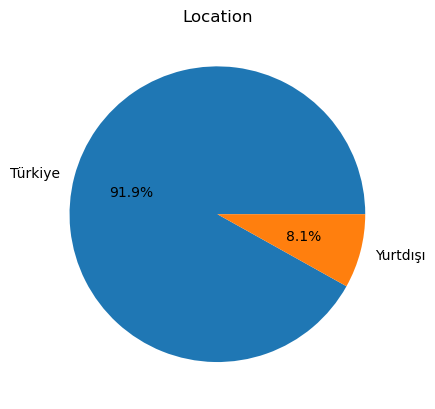

In [68]:
plot_location_pie(junior_table)

### Junior kategorisindeki verilerin dağılımı yukarıda gösterilmiştir. 469 adet gözlem bulunmaktadır.

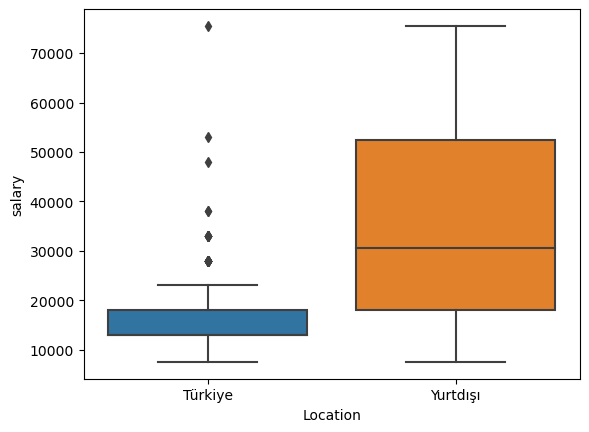

In [69]:
plot_location_box(df, "Junior")

### Kutu grafiği ile gösterilen verilerde **Junior** kategorisindeki maaşların dağılımı gösterilmiştir. Türkiye ortalaması **15.400 TL** ve yurtdışı ortalaması **34.800 TL** dir.

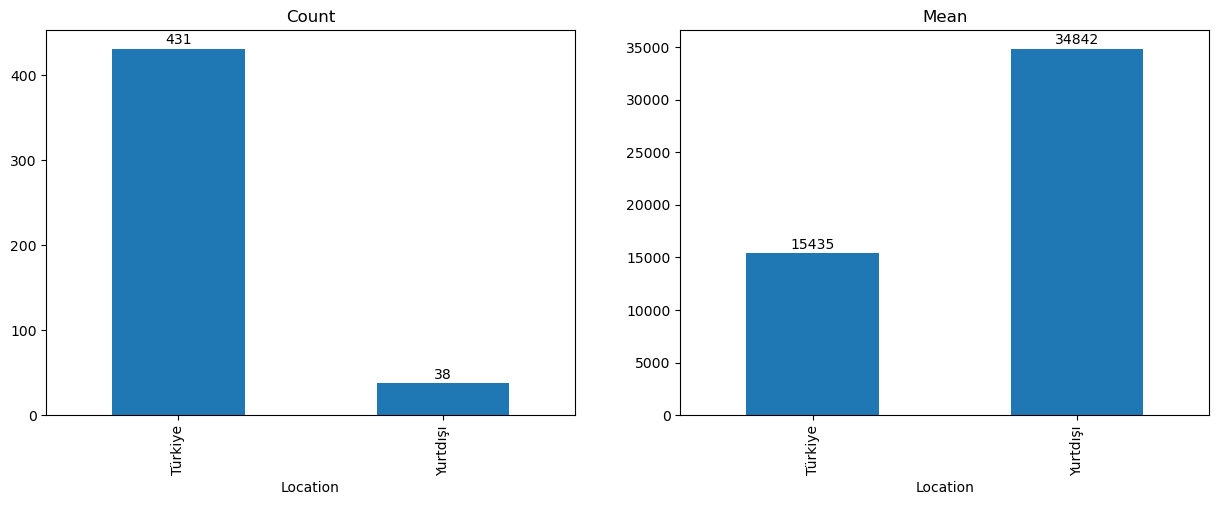

In [70]:
plot_location_bar(junior_table["salary"], label=True)

### Junior Verileri Türkiye ve Yurtdışı Olarak Dağılımı Bar Grafiği İle Gösterilmiştir. **Türkiye** ortalaması **15400 TL** ve **Yurtdışı** ortalaması **34800 TL**. Yurtdışı maaşlarının TL olarak daha yüksek olduğu görülmektedir.

In [71]:
junior_table2 = create_location_way_of_working_table(df, "Junior")

In [72]:
junior_table2

count                 mean                  
Way_of_working Hybrid Ofis Remote   Hybrid     Ofis   Remote
Location                                                    
Türkiye           129  111    191 15089.15 14283.78 16337.70
Yurtdışı            7    6     25 35142.86 30500.00 35800.00

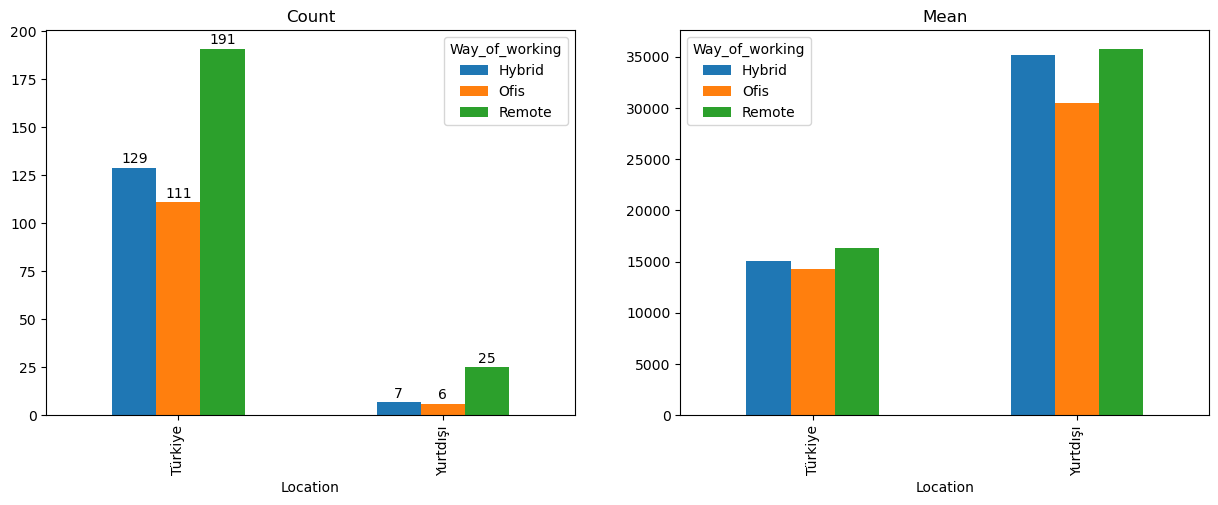

In [73]:
plot_location_bar(junior_table2)

### Junior Level verileri çalışma şekillerine göre dağılımı bar grafiği ile gösterilmiştir.

In [74]:
jr_experience_table = df[df["Level"] == "Junior"].groupby("Experience").agg({"salary": ["count","mean","std", "median", "min", "max"]})

In [75]:
jr_experience_table

salary                                             
            count     mean      std   median      min      max
Experience                                                    
0-1 Yıl       263 14612.17  8699.16 13000.00  7500.00 75500.00
1-3 Yıl       203 20049.26 11362.29 18000.00  7500.00 75500.00
10+ Yıl         1 38000.00      NaN 38000.00 38000.00 38000.00
4-6 Yıl         2 12750.00  7424.62 12750.00  7500.00 18000.00

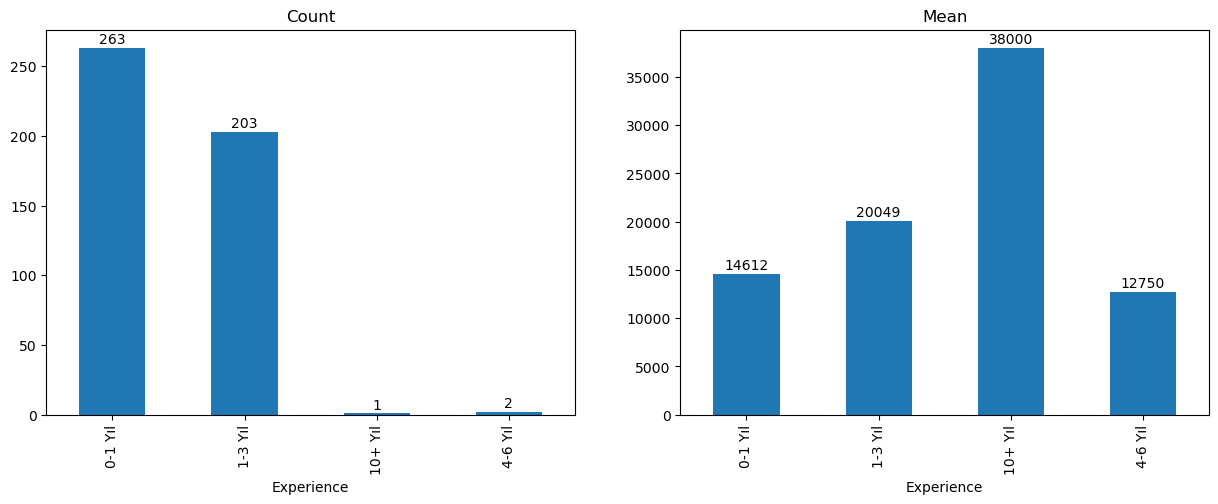

In [76]:
plot_location_bar(jr_experience_table["salary"], label=True)

### Junior Level verileri deneyime göre maaş dağılımı bar grafiği ile gösterilmiştir.

In [77]:
jr_experience_table2 = df[df["Level"] == "Junior"].pivot_table(index="Experience", columns="Way_of_working", values="salary", aggfunc=["count","mean"])

In [78]:
jr_experience_table2

count                  mean                  
Way_of_working Hybrid  Ofis Remote   Hybrid     Ofis   Remote
Experience                                                   
0-1 Yıl         77.00 80.00 106.00 14792.21 14062.50 14896.23
1-3 Yıl         59.00 35.00 109.00 17855.93 17657.14 22004.59
10+ Yıl           NaN   NaN   1.00      NaN      NaN 38000.00
4-6 Yıl           NaN  2.00    NaN      NaN 12750.00      NaN

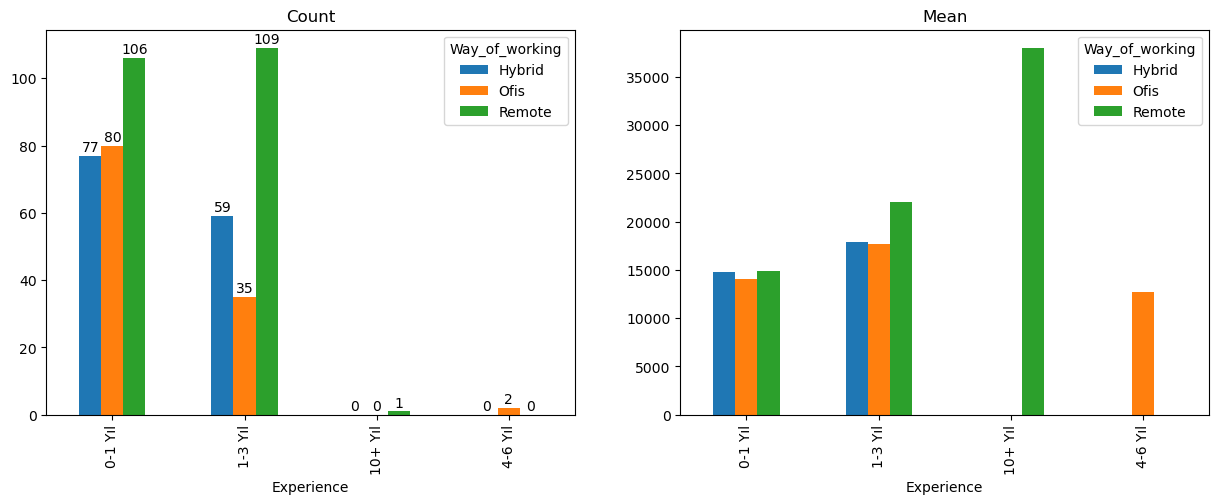

In [79]:
plot_location_bar(jr_experience_table2)

### Junior Level Verileri Deneyime Göre ve Çalışma Şekline Göre Dağılımı Bar Grafiği İle Gösterilmiştir.

## Mid

In [80]:
mid_table = create_location_salary_table(df, "Mid")

In [81]:
mid_table

salary                                             
          count     mean      std   median      min      max
Location                                                    
Türkiye     350 25632.86 10663.93 23000.00  7500.00 85500.00
Yurtdışı     34 46779.41 21353.16 48000.00 13000.00 85500.00

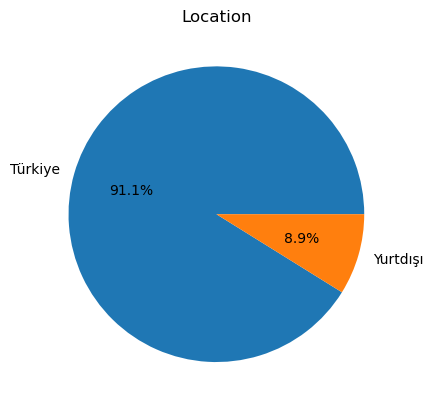

In [82]:
plot_location_pie(mid_table)

### Mid kategorisindeki verilerin dağılımı yukarıda gösterilmiştir. 384 adet gözlem bulunmaktadır.

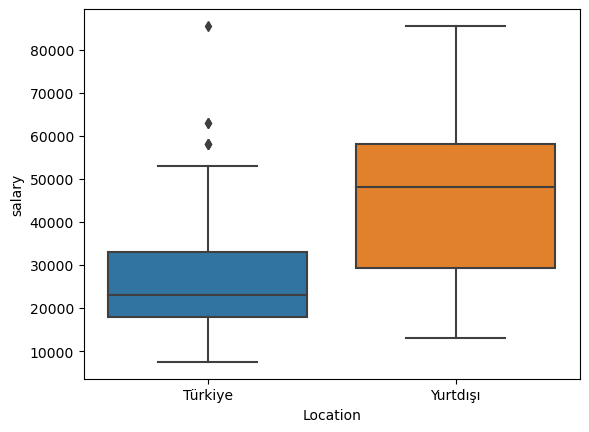

In [83]:
plot_location_box(df, "Mid")

### Kutu grafiği ile gösterilen verilerde **Mid Level** kategorisindeki maaşların dağılımı gösterilmiştir. Türkiye ortalaması **25.600 TL** ve yurtdışı ortalaması **46.700 TL** dir.

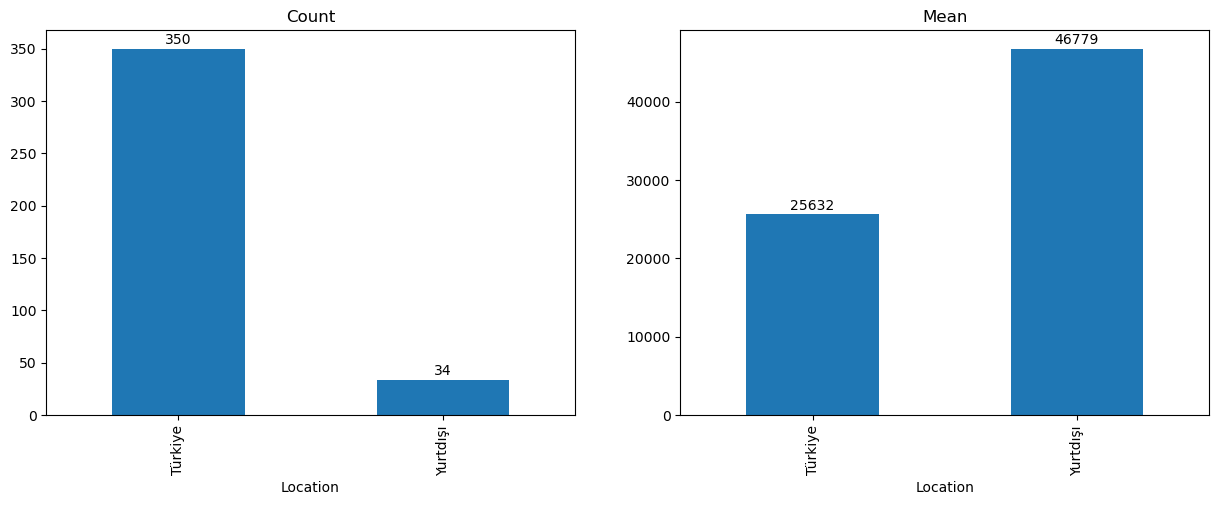

In [84]:
plot_location_bar(mid_table["salary"], label=True)

### Mid Level Verilerinin Türkiye ve Yurtdışı Olarak Dağılımı Bar Grafiği İle Gösterilmiştir. **Türkiye** ortalaması **25600 TL** ve **Yurtdışı** ortalaması **46700 TL**. Yurtdışı maaşlarının TL olarak daha yüksek olduğu görülmektedir.

In [85]:
mid_table2 = create_location_way_of_working_table(df, "Mid")

In [86]:
mid_table2

count                 mean                  
Way_of_working Hybrid Ofis Remote   Hybrid     Ofis   Remote
Location                                                    
Türkiye           112   49    189 25589.29 21234.69 26798.94
Yurtdışı            6    2     26 54833.33 34250.00 45884.62

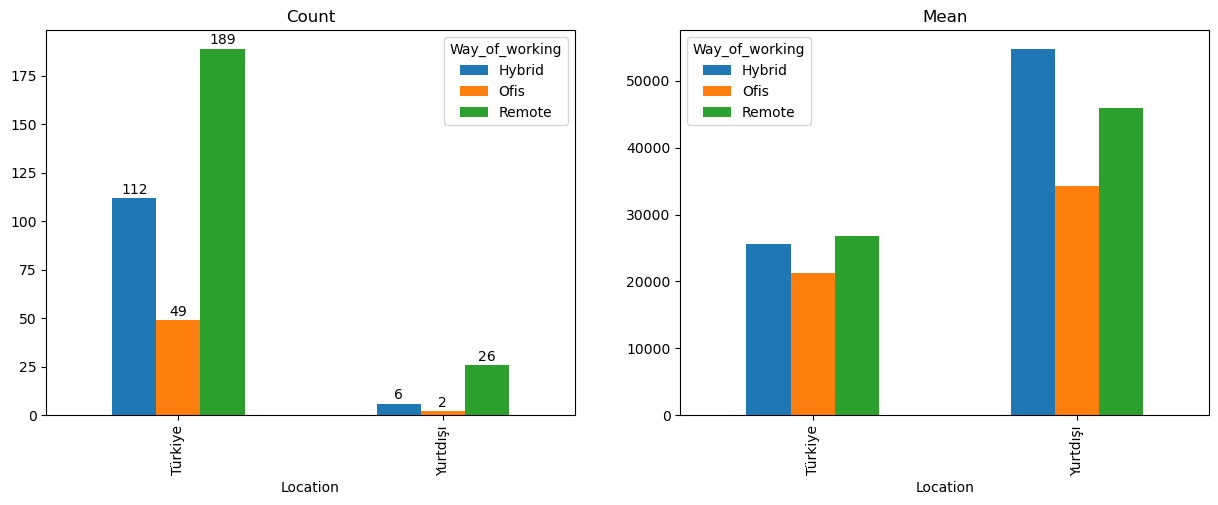

In [87]:
plot_location_bar(mid_table2)

### Mid Level verileri çalışma şekillerine göre dağılımı bar grafiği ile gösterilmiştir.

In [88]:
mid_experience_table = df[df["Level"] == "Mid"].groupby("Experience").agg({"salary": ["count","mean","std", "median", "min", "max"]})

In [89]:
mid_experience_table

salary                                             
            count     mean      std   median      min      max
Experience                                                    
0-1 Yıl         5 19900.00 10514.28 18000.00  7500.00 33000.00
1-3 Yıl       226 25207.96 11550.90 23000.00  7500.00 85500.00
10+ Yıl         4 47375.00 29465.73 50500.00 13000.00 75500.00
4-6 Yıl       139 30348.92 14117.73 28000.00  7500.00 85500.00
7-9 Yıl        10 35750.00 18724.98 30500.00 18000.00 75500.00

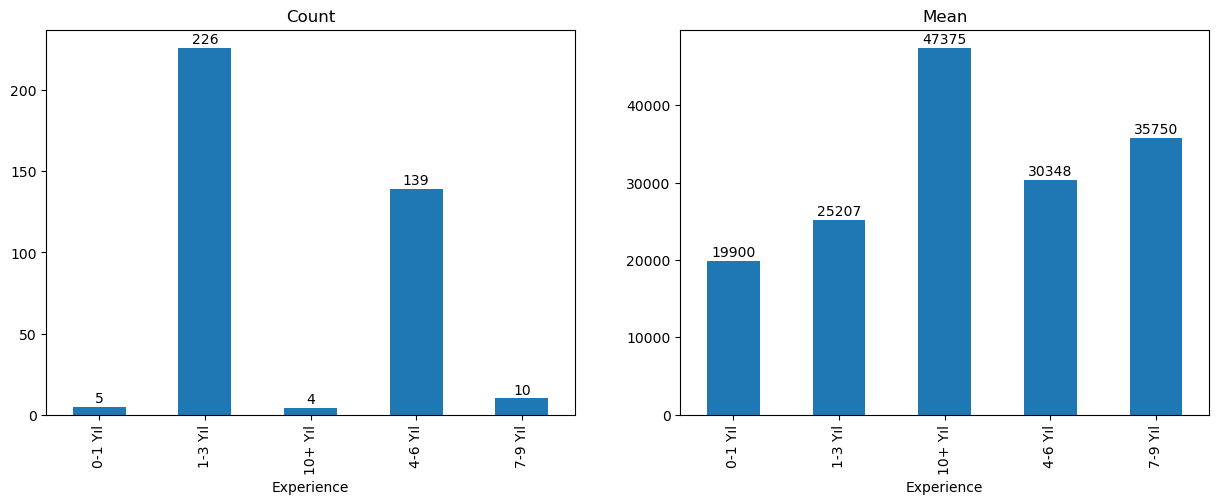

In [90]:
plot_location_bar(mid_experience_table["salary"], label=True)

### Mid Level verileri deneyime göre maaş dağılımı bar grafiği ile gösterilmiştir.

In [91]:
mid_experience_table2 = df[df["Level"] == "Mid"].pivot_table(index="Experience", columns="Way_of_working", values="salary", aggfunc=["count","mean"])

In [92]:
mid_experience_table2

count                  mean                  
Way_of_working Hybrid  Ofis Remote   Hybrid     Ofis   Remote
Experience                                                   
0-1 Yıl          2.00   NaN   3.00 23000.00      NaN 17833.33
1-3 Yıl         72.00 28.00 126.00 24229.17 20642.86 26781.75
10+ Yıl           NaN  1.00   3.00      NaN 13000.00 58833.33
4-6 Yıl         42.00 19.00  78.00 31630.95 22315.79 31615.38
7-9 Yıl          2.00  3.00   5.00 38000.00 31333.33 37500.00

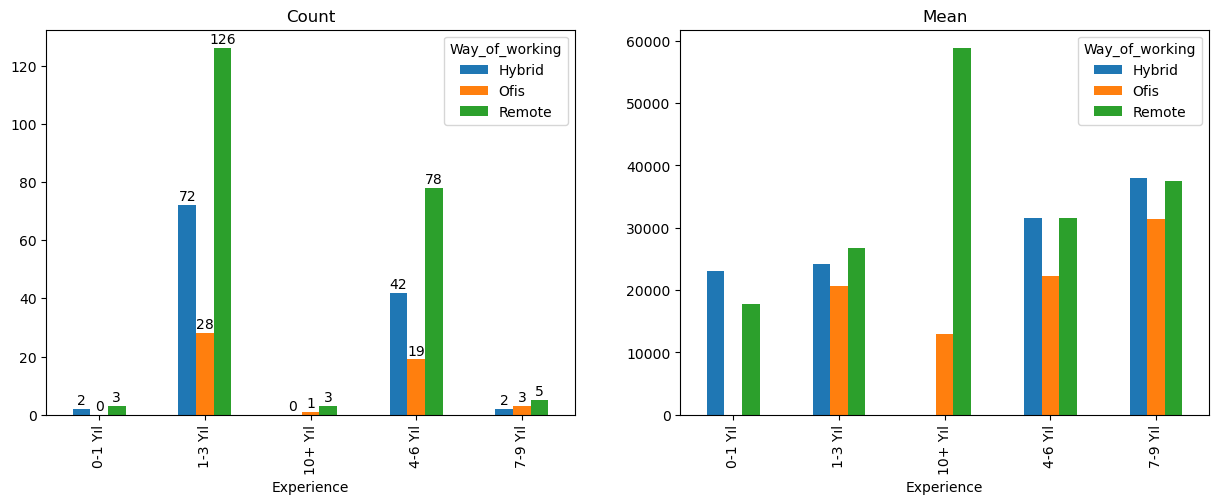

In [93]:
plot_location_bar(mid_experience_table2)

### Mid Level Verileri Deneyime Göre ve Çalışma Şekline Göre Dağılımı Bar Grafiği İle Gösterilmiştir.

## Senior

In [94]:
senior_table = create_location_salary_table(df, "Senior")

In [95]:
senior_table

salary                                              
          count     mean      std   median      min       max
Location                                                     
Türkiye     252 39065.48 17280.52 38000.00  7500.00 123000.00
Yurtdışı     59 63686.44 20892.36 63000.00 18000.00 123000.00

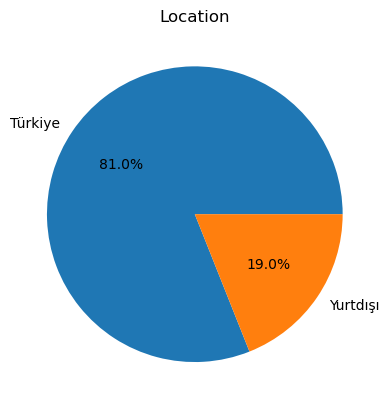

In [96]:
plot_location_pie(senior_table)

### Senior kategorisindeki verilerin dağılımı yukarıda gösterilmiştir. 311 adet gözlem bulunmaktadır.

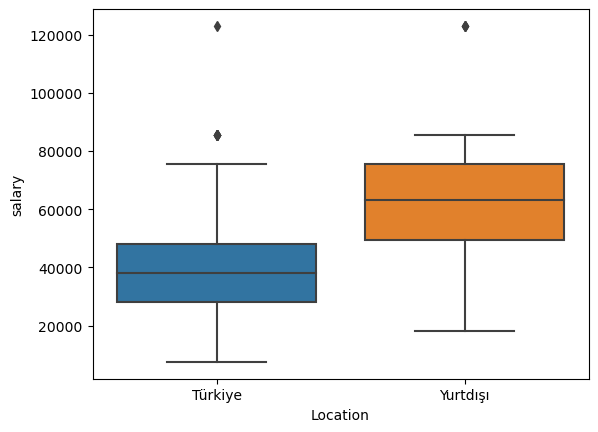

In [97]:
plot_location_box(df, "Senior")

### Kutu grafiği ile gösterilen verilerde **Senior Level** kategorisindeki maaşların dağılımı gösterilmiştir. Türkiye ortalaması **39.000 TL** ve yurtdışı ortalaması **63.600 TL** dir.

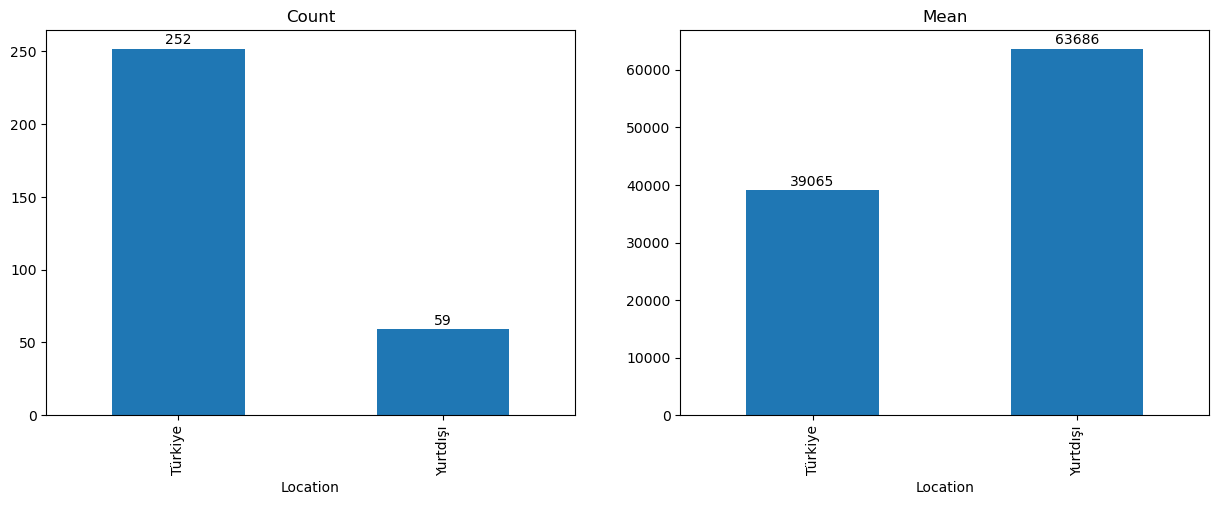

In [98]:
plot_location_bar(senior_table["salary"], label=True)

### Senior Level Verilerinin Türkiye ve Yurtdışı Olarak Dağılımı Bar Grafiği İle Gösterilmiştir. **Türkiye** ortalaması **39000 TL** ve **Yurtdışı** ortalaması **63600 TL**. Yurtdışı maaşlarının TL olarak daha yüksek olduğu görülmektedir.

In [99]:
senior_table2 = create_location_way_of_working_table(df, "Senior")

In [100]:
senior_table2

count                 mean                  
Way_of_working Hybrid Ofis Remote   Hybrid     Ofis   Remote
Location                                                    
Türkiye            77   53    122 40097.40 33632.08 40774.59
Yurtdışı           10    2     47 73950.00 63000.00 61531.91

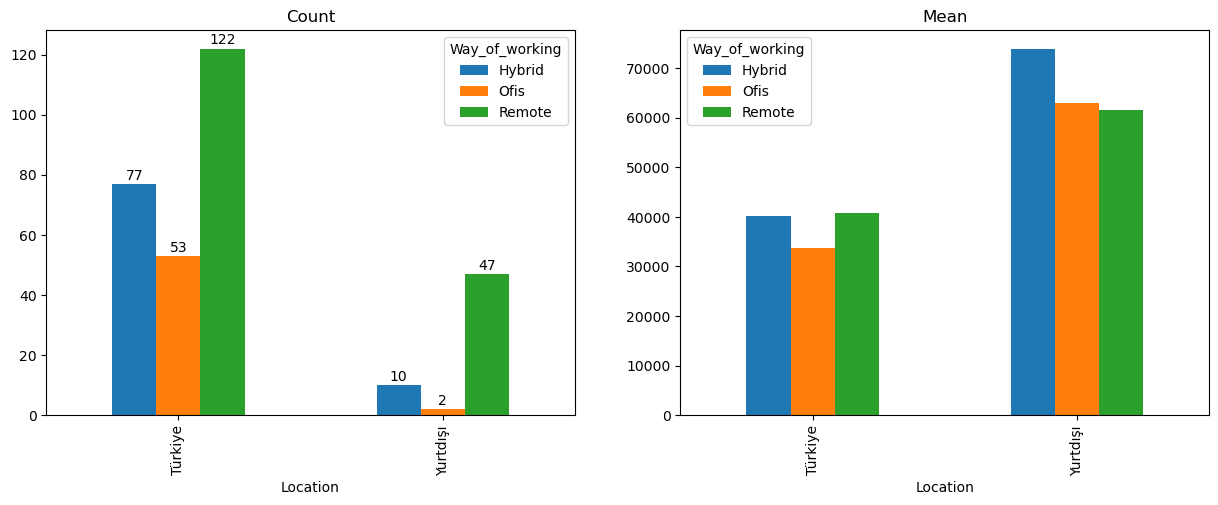

In [101]:
plot_location_bar(senior_table2)

### Senior Level verileri çalışma şekillerine göre dağılımı bar grafiği ile gösterilmiştir.

In [102]:
senior_experience_table = df[df["Level"] == "Senior"].groupby("Experience").agg({"salary": ["count","mean","std", "median", "min", "max"]})

In [103]:
senior_experience_table

salary                                              
            count     mean      std   median      min       max
Experience                                                     
1-3 Yıl         9 39388.89 18754.63 33000.00 18000.00  75500.00
10+ Yıl       129 48488.37 23462.36 43000.00  7500.00 123000.00
4-6 Yıl        83 39090.36 14873.68 38000.00 13000.00  85500.00
7-9 Yıl        90 41644.44 19128.37 43000.00  7500.00  85500.00

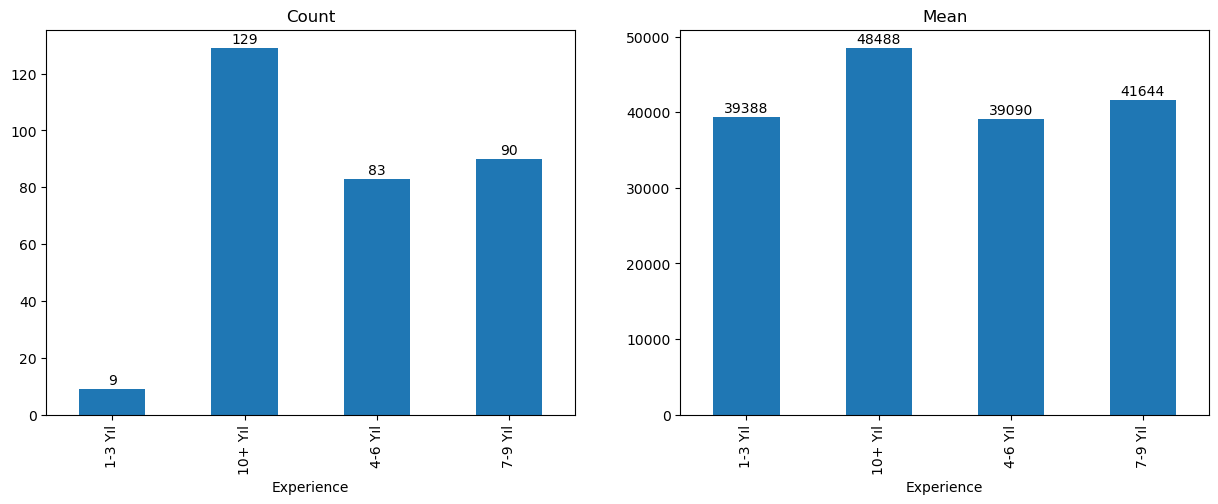

In [104]:
plot_location_bar(senior_experience_table["salary"], label=True)

### Senior Level verileri deneyime göre maaş dağılımı bar grafiği ile gösterilmiştir.

In [105]:
senior_experience_table2 = df[df["Level"] == "Senior"].pivot_table(index="Experience", columns="Way_of_working", values="salary", aggfunc=["count","mean"])

In [106]:
senior_experience_table2

count                 mean                  
Way_of_working Hybrid Ofis Remote   Hybrid     Ofis   Remote
Experience                                                  
1-3 Yıl             2    1      6 33000.00 18000.00 45083.33
10+ Yıl            36   32     61 51555.56 37093.75 52655.74
4-6 Yıl            23    8     52 35826.09 30500.00 41855.77
7-9 Yıl            26   14     50 41576.92 32821.43 44150.00

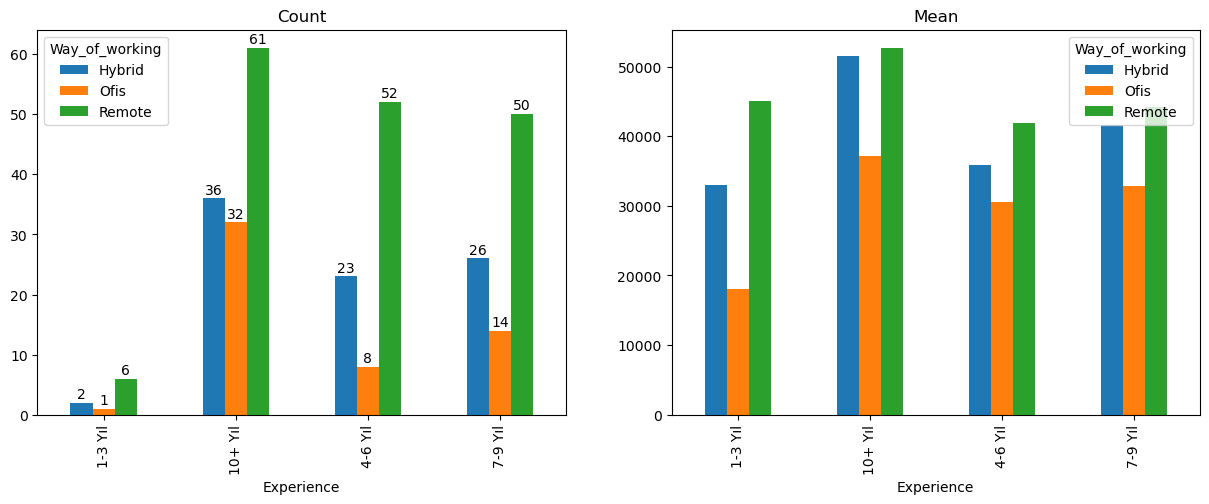

In [107]:
plot_location_bar(senior_experience_table2)

### Senior Level Verileri Deneyime Göre ve Çalışma Şekline Göre Dağılımı Bar Grafiği İle Gösterilmiştir.